# Data Mining Project

## Advance Credit Lending Fault Detection System Using Data Mining Technique

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

In [2]:
df = pd.read_csv("lending_club_loan_two.csv")

In [3]:
meta_data = pd.read_csv("lending_club_info.csv")
meta_data

,LoanStatNew,Description
0,loan_amnt,The listed amount of the loan applied for by t...
1,term,The number of payments on the loan. Values are...
2,int_rate,Interest Rate on the loan
3,installment,The monthly payment owed by the borrower if th...
4,grade,LC assigned loan grade
5,sub_grade,LC assigned loan subgrade
6,emp_title,The job title supplied by the Borrower when ap...
7,emp_length,Employment length in years. Possible values ar...
8,home_ownership,The home ownership status provided by the borr...
9,annual_inc,The self-reported annual income provided by th...


In [4]:
meta_data["Description"][4]
# for description of data

'LC assigned loan grade'

In [5]:
df.shape
# to get the shape of the data
# we have 396k Rows & 27 columns which means we have 26 features


(396030, 27)

In [6]:
df.head().T # df.head.T to get all the columns of the data 

,0,1,2,3,4
loan_amnt,10000.0,8000.0,15600.0,7200.0,24375.0
term,36 months,36 months,36 months,36 months,60 months
int_rate,11.44,11.99,10.49,6.49,17.27
installment,329.48,265.68,506.97,220.65,609.33
grade,B,B,B,A,C
sub_grade,B4,B5,B3,A2,C5
emp_title,Marketing,Credit analyst,Statistician,Client Advocate,Destiny Management Inc.
emp_length,10+ years,4 years,< 1 year,6 years,9 years
home_ownership,RENT,MORTGAGE,RENT,RENT,MORTGAGE
annual_inc,117000.0,65000.0,43057.0,54000.0,55000.0


 most of the columns are categorical in nature 
 and the First thing we should always do  is to look into the distribution of target variable
 The “target variable” is the variable whose values are to be modeled and predicted by other variables.


<AxesSubplot:xlabel='loan_status', ylabel='count'>

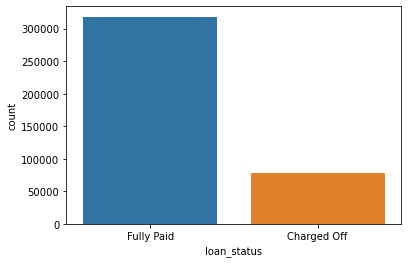

In [7]:
# our target variable is categorical in nature we are going to count plot using the seaborn
sns.countplot(x="loan_status",data=df)
# charged off means didn't paid the loan  

In [8]:
# to get the exact of of values we will use the value count methond
values = df['loan_status'].value_counts()
values*100/len(df) # for better understanding we are using percentages

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [9]:
# we are having the ratio of 80:20 
# this is called highly imbalanced dataset which will lead to more data of full paid so our model will get biased towards the
#fully paid

<AxesSubplot:xlabel='loan_amnt', ylabel='Count'>

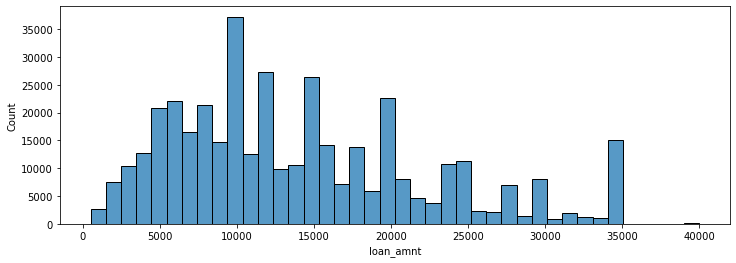

In [10]:
# next we will visualize the loan ammount since it is a continous variable we have to use the histogram
# we are using the plot size of 12 by 4 
plt.figure(figsize=(12,4))
sns.histplot(df["loan_amnt"],bins=40)
# it has right skew distribution positively skewed distri
# 40000 is the outliers

' loan ammont are high correlated with the installments reason being installments are calculated on the loan ammount hence, there is strong correlation '

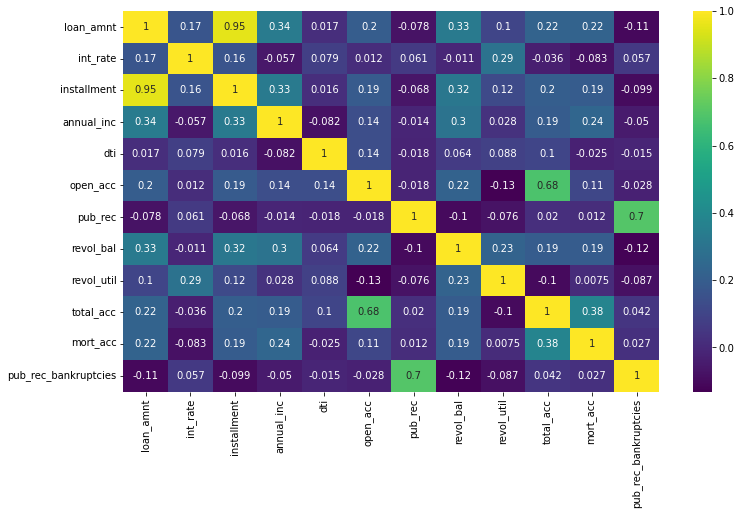

In [11]:
# heatmap is the better way to visualize the corelation matrix
plt.figure(figsize=(12,7))
sns.heatmap(df.corr(),annot = True, cmap='viridis') # it takes few parameters first corelation matrix set annot to true to get the correlation value
# n then the color map for the heat map 

# yellow represents the positive correlation 
# dark voilet represents the negetive correlation
""" loan ammont are high correlated with the installments reason being installments are calculated on the loan ammount hence, there is strong correlation """
# there is a strong realtion between the installments and the loan amounts

'we can conclude that the loan installments is different for same loan ammount \nand their can be many factor like someone has taken a loan for period of 10 year and someone took loan for 15 year\n\nwe make use of no of years and the int rate\n'

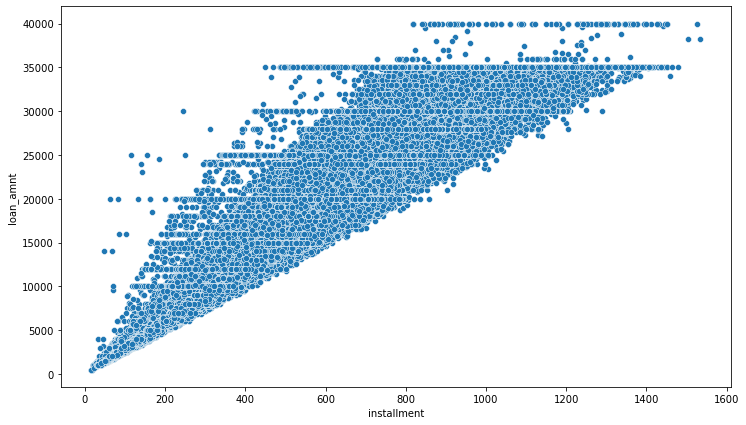

In [12]:
# scatter plot gives more clarity how the relationship is working
plt.figure(figsize=(12,7))
sns.scatterplot(x="installment", y="loan_amnt", data=df)

'''we can conclude that the loan installments is different for same loan ammount 
and their can be many factor like someone has taken a loan for period of 10 year and someone took loan for 15 year

we make use of no of years and the int rate
'''

<AxesSubplot:xlabel='loan_status', ylabel='loan_amnt'>

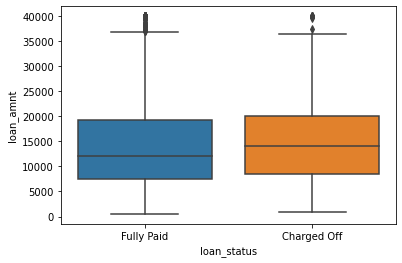

In [13]:
# next are gonna see how loan ammount affect the loan status
# box plot uses for outliers detection 
sns.boxplot(x='loan_status', y='loan_amnt', data=df)
# the line inside the box is median 
# median loan ammount is almost equal so based on this we can make an assumption loan ammount is not a good factor in deciding
# whether the person will default or not

In [14]:
df.groupby('loan_status')['loan_amnt'].describe()
# it will give the same summary as the box plot gave

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [15]:
# next grade variable 
df['grade'] # to check the meta of the grade

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 396030, dtype: object

In [16]:
meta_data["Description"][4]
# it is a grade given to a particular loan 
# if  a person is paying everything on time and doing everything right the customer is resign grade "A"

'LC assigned loan grade'

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

<AxesSubplot:xlabel='grade', ylabel='count'>

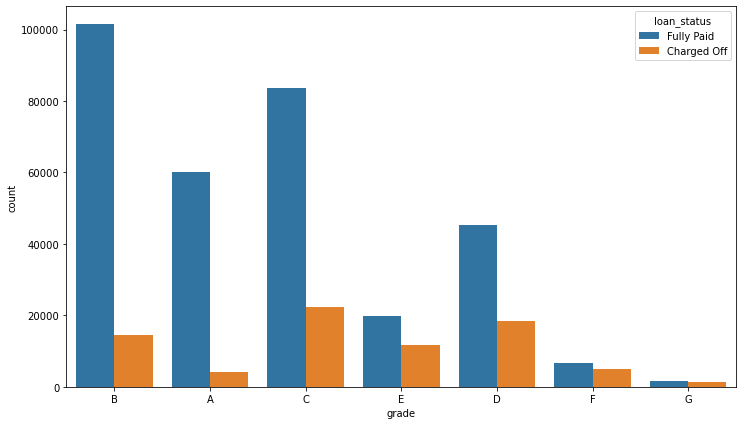

In [18]:
# check how grading affect the loan 
plt.figure(figsize=(12,7))
sns.countplot(x= "grade", hue = "loan_status", data=df)

In [19]:
# this shows as the grade goes from A -> B, B->C the default rate increases 
df[df["grade"]=="A"].groupby("loan_status")["grade"].count()*100/len(df[df["grade"]=="A"])
# for type A loan the percentage of people defaulted is 6% only


loan_status
Charged Off     6.287878
Fully Paid     93.712122
Name: grade, dtype: float64

In [20]:
df[df["grade"]=="B"].groupby("loan_status")["grade"].count()*100/len(df[df["grade"]=="B"])
# for type A loan the percentage of people defaulted is 12%

loan_status
Charged Off    12.573049
Fully Paid     87.426951
Name: grade, dtype: float64

In [21]:
df[df["grade"]=="G"].groupby("loan_status")["grade"].count()*100/len(df[df["grade"]=="G"])
# for type A loan the percentage of people defaulted is 47% 

loan_status
Charged Off    47.8389
Fully Paid     52.1611
Name: grade, dtype: float64

In [22]:
df["sub_grade"].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

In [23]:
sub_order=sorted(df["sub_grade"].unique())
sub_order

['A1',
 'A2',
 'A3',
 'A4',
 'A5',
 'B1',
 'B2',
 'B3',
 'B4',
 'B5',
 'C1',
 'C2',
 'C3',
 'C4',
 'C5',
 'D1',
 'D2',
 'D3',
 'D4',
 'D5',
 'E1',
 'E2',
 'E3',
 'E4',
 'E5',
 'F1',
 'F2',
 'F3',
 'F4',
 'F5',
 'G1',
 'G2',
 'G3',
 'G4',
 'G5']

we are sorting the subgrade 

<AxesSubplot:xlabel='sub_grade', ylabel='count'>

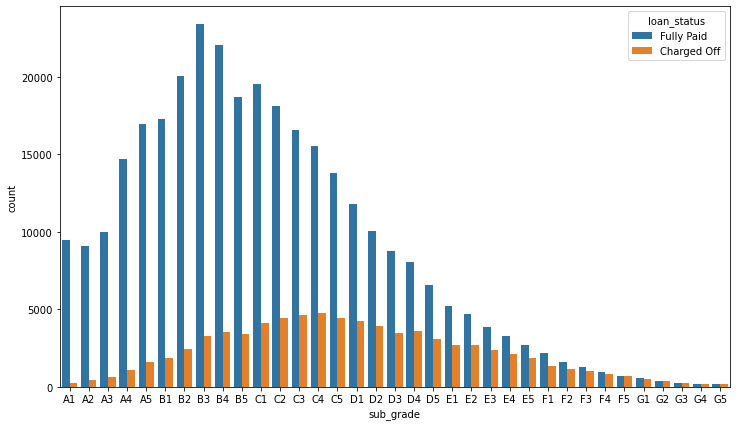

In [24]:
plt.figure(figsize=(12,7))
sns.countplot(x= "sub_grade", hue = "loan_status",order=sub_order, data=df)

In [25]:
df[df["sub_grade"]=="A1"].groupby("loan_status")["sub_grade"].count()*100/len(df[df["sub_grade"]=="A1"])


loan_status
Charged Off     2.867715
Fully Paid     97.132285
Name: sub_grade, dtype: float64

In [26]:
df[df["sub_grade"]=="A2"].groupby("loan_status")["sub_grade"].count()*100/len(df[df["sub_grade"]=="A2"])


loan_status
Charged Off     4.818647
Fully Paid     95.181353
Name: sub_grade, dtype: float64

In [27]:
df[df["sub_grade"]=="B2"].groupby("loan_status")["sub_grade"].count()*100/len(df[df["sub_grade"]=="B2"])


loan_status
Charged Off    10.8513
Fully Paid     89.1487
Name: sub_grade, dtype: float64

<AxesSubplot:xlabel='emp_length', ylabel='count'>

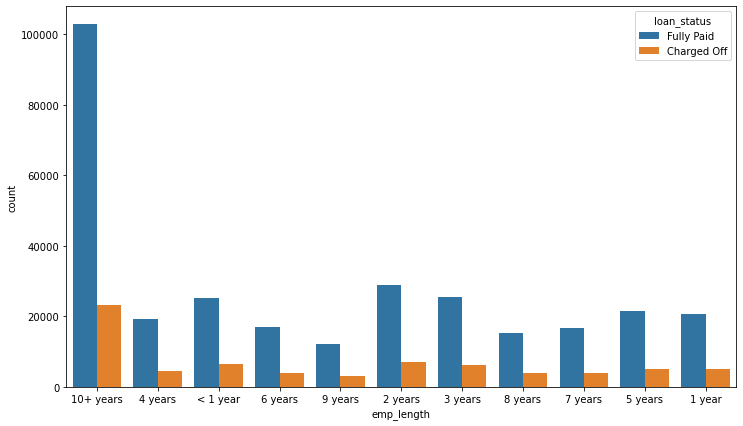

In [28]:
# Now how employee length affect the loan status
plt.figure(figsize=(12,7))
sns.countplot(x= "emp_length", hue = "loan_status", data=df)

<AxesSubplot:xlabel='verification_status', ylabel='count'>

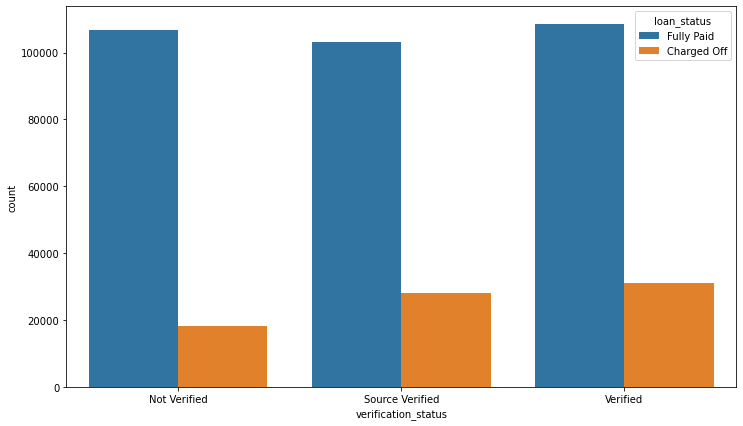

In [29]:
#check for the verfication status
plt.figure(figsize=(12,7))
sns.countplot(x= "verification_status", hue = "loan_status", data=df)

the above diagram shows the distribution for note verfied, source verified, verified is almost simmilar 
the graph shows the company verification process is not as effiecient as it should be 
there should be decreased the the count of charged off for source verified


In [30]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off'], dtype=object)

In [31]:
df["loan_status"]=df["loan_status"].apply(lambda x:1 if x == "Fully Paid" else 0)

In [32]:
df['loan_status'].unique()

array([1, 0], dtype=int64)

<AxesSubplot:>

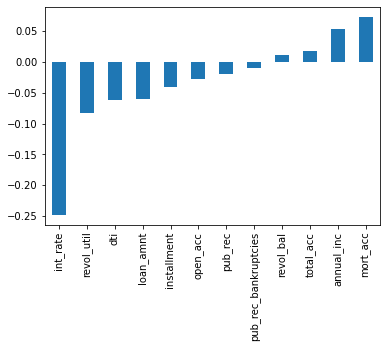

In [33]:
df.corr()["loan_status"].sort_values().drop("loan_status").plot(kind="bar")

In [34]:
# checking the Missing Values
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

# Filling Missing Values

## Emp title

In [35]:
df['emp_title'].nunique()

173105

In [36]:
df.shape

(396030, 27)

In [37]:
df.drop("emp_title", axis=1,inplace= True)

In [38]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

## emp_length

In [39]:
df['emp_length'].unique()

array(['10+ years', '4 years', '< 1 year', '6 years', '9 years',
       '2 years', '3 years', '8 years', '7 years', '5 years', '1 year',
       nan], dtype=object)

In [40]:
df.drop("emp_length", axis=1,inplace= True)

In [41]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

## title column

In [42]:
df['title'].nunique()

48817

In [43]:
# purpose is the duplicate variable same as title with less unique values  
df['purpose']

0                   vacation
1         debt_consolidation
2                credit_card
3                credit_card
4                credit_card
                 ...        
396025    debt_consolidation
396026    debt_consolidation
396027    debt_consolidation
396028    debt_consolidation
396029    debt_consolidation
Name: purpose, Length: 396030, dtype: object

In [44]:
df.drop("title", axis=1, inplace= True)

In [45]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

## mort_acc
### we are using mean to fill the missing values

In [46]:
df["mort_acc"]=df["mort_acc"].fillna(np.mean(df["mort_acc"]))

In [47]:
df.isnull().sum()*100/len(df)

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

dropping the rest values which have the missing data less than the -1


In [48]:
df.dropna(inplace=True)

In [49]:
df.isnull().sum()*100/len(df)

loan_amnt               0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
dti                     0.0
earliest_cr_line        0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
initial_list_status     0.0
application_type        0.0
mort_acc                0.0
pub_rec_bankruptcies    0.0
address                 0.0
dtype: float64

# Feature Engineering 
### means when we try to extract the meaningful data from those data which doesnt seem meaningful at all 


In [50]:
# printing all the categorical data from the data set
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'purpose', 'earliest_cr_line', 'initial_list_status',
       'application_type', 'address'],
      dtype='object')

Now, we are trying to grab the features out of all the data present

In [54]:
df['term']

0          36 months
1          36 months
2          36 months
3          36 months
4          60 months
             ...    
396025     60 months
396026     36 months
396027     36 months
396028     60 months
396029     36 months
Name: term, Length: 395219, dtype: object

In [56]:
df['term'] = df['term'].apply(lambda x : int(x[:3]))

In [58]:
df['grade']

0         B
1         B
2         B
3         A
4         C
         ..
396025    B
396026    C
396027    B
396028    C
396029    C
Name: grade, Length: 395219, dtype: object

In [59]:
df['sub_grade']

0         B4
1         B5
2         B3
3         A2
4         C5
          ..
396025    B4
396026    C1
396027    B1
396028    C2
396029    C2
Name: sub_grade, Length: 395219, dtype: object

sub_grade column derived from grade so we can drop either of them

In [61]:
df.drop('sub_grade',axis =1, inplace = True)

In [65]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: home_ownership, dtype: int64

In [66]:
df["home_ownership"] = df['home_ownership'].replace(['NONE','ANY'], "OTHER")

In [67]:
df['home_ownership'].value_counts()

MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          142
Name: home_ownership, dtype: int64

In [68]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [71]:
df['zip'] = df['address'].apply(lambda x: x[-5:])

In [72]:
df['zip']

0         22690
1         05113
2         05113
3         00813
4         11650
          ...  
396025    30723
396026    05113
396027    70466
396028    29597
396029    48052
Name: zip, Length: 395219, dtype: object

In [73]:
df.drop('address',axis=1, inplace=True)

In [74]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [75]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : x[-4:])

In [76]:
df['earliest_cr_line']

0         1990
1         2004
2         2007
3         2006
4         1999
          ... 
396025    2004
396026    2006
396027    1997
396028    1990
396029    1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [79]:
df['pub_rec'].value_counts() # 0 is good customer and everything else is bad customer

0.0     337489
1.0      49713
2.0       5474
3.0       1521
4.0        527
5.0        237
6.0        122
7.0         56
8.0         34
9.0         12
10.0        11
11.0         8
13.0         4
12.0         4
19.0         2
40.0         1
17.0         1
86.0         1
24.0         1
15.0         1
Name: pub_rec, dtype: int64

In [81]:
df['pub_rec'] = df['pub_rec'].apply(lambda x : 0 if x==0 else 1)

In [83]:
df['pub_rec'].value_counts()

0    337489
1     57730
Name: pub_rec, dtype: int64

In [84]:
df

,loan_amnt,term,int_rate,installment,grade,home_ownership,annual_inc,verification_status,issue_d,loan_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,zip
0,10000.0,36,11.44,329.48,B,RENT,117000.0,Not Verified,Jan-2015,1,...,16.0,0,36369.0,41.8,25.0,w,INDIVIDUAL,0.000000,0.0,22690
1,8000.0,36,11.99,265.68,B,MORTGAGE,65000.0,Not Verified,Jan-2015,1,...,17.0,0,20131.0,53.3,27.0,f,INDIVIDUAL,3.000000,0.0,05113
2,15600.0,36,10.49,506.97,B,RENT,43057.0,Source Verified,Jan-2015,1,...,13.0,0,11987.0,92.2,26.0,f,INDIVIDUAL,0.000000,0.0,05113
3,7200.0,36,6.49,220.65,A,RENT,54000.0,Not Verified,Nov-2014,1,...,6.0,0,5472.0,21.5,13.0,f,INDIVIDUAL,0.000000,0.0,00813
4,24375.0,60,17.27,609.33,C,MORTGAGE,55000.0,Verified,Apr-2013,0,...,13.0,0,24584.0,69.8,43.0,f,INDIVIDUAL,1.000000,0.0,11650
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60,10.99,217.38,B,RENT,40000.0,Source Verified,Oct-2015,1,...,6.0,0,1990.0,34.3,23.0,w,INDIVIDUAL,0.000000,0.0,30723
396026,21000.0,36,12.29,700.42,C,MORTGAGE,110000.0,Source Verified,Feb-2015,1,...,6.0,0,43263.0,95.7,8.0,f,INDIVIDUAL,1.000000,0.0,05113
396027,5000.0,36,9.99,161.32,B,RENT,56500.0,Verified,Oct-2013,1,...,15.0,0,32704.0,66.9,23.0,f,INDIVIDUAL,0.000000,0.0,70466
396028,21000.0,60,15.31,503.02,C,MORTGAGE,64000.0,Verified,Aug-2012,1,...,9.0,0,15704.0,53.8,20.0,f,INDIVIDUAL,5.000000,0.0,29597


## Converting Cateogorical Data into Numerical 
### we will use the Numerical Encoding 

In [90]:
cols = df.select_dtypes(['object']).columns
cols

Index(['grade', 'home_ownership', 'verification_status', 'issue_d', 'purpose',
       'earliest_cr_line', 'initial_list_status', 'application_type', 'zip'],
      dtype='object')

In [95]:
def ordinal_mapper(data,var):
    ordinal_map = {k:i for i,k in enumerate(data[var].unique(),0)}
    data[var] = data[var].map(ordinal_map)

In [96]:
for var in cols:
    ordinal_mapper(df,var)

In [98]:
df[cols]

,grade,home_ownership,verification_status,issue_d,purpose,earliest_cr_line,initial_list_status,application_type,zip
0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,1,1,1,0,1
2,0,0,1,0,2,2,1,0,1
3,1,0,0,1,2,3,1,0,2
4,2,1,2,2,2,4,1,0,3
...,...,...,...,...,...,...,...,...,...
396025,0,0,1,14,1,1,0,0,4
396026,2,1,1,23,1,3,1,0,1
396027,0,0,2,21,1,7,1,0,5
396028,2,1,2,55,1,0,1,0,6


# Train Test Split 

In [131]:
data=df.sample(frac=.5,random_state=101)

In [132]:
from sklearn.model_selection import train_test_split

In [133]:
X = data.drop('loan_status', axis=1).values # feature is everything except the loan status 
y = data['loan_status'].values # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Normalizing the Data

In [134]:
from sklearn.preprocessing import MinMaxScaler # to scale the dataset

In [135]:
scaler = MinMaxScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
 # Next We have to fit the MinMax scaler on the traning data as well as transform it 

In [136]:
X_train

array([[0.62025316, 0.        , 0.13946241, ..., 0.02941176, 0.        ,
        0.22222222],
       [0.09367089, 0.        , 0.25983638, ..., 0.05335267, 0.        ,
        0.44444444],
       [0.16455696, 1.        , 0.33735878, ..., 0.05335267, 0.        ,
        0.22222222],
       ...,
       [0.59493671, 0.        , 0.22088041, ..., 0.02941176, 0.125     ,
        0.11111111],
       [0.18797468, 0.        , 0.30346708, ..., 0.08823529, 0.        ,
        0.11111111],
       [0.36708861, 0.        , 0.25983638, ..., 0.05882353, 0.        ,
        0.22222222]])

# Modelling

In [137]:
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix 

In [138]:
algo = [LinearSVC(),
        LogisticRegression(random_state = 0 ,solver = "lbfgs", max_iter=1000),
        GaussianNB(),
        RandomForestClassifier(random_state=0, n_estimators=10)]

In [139]:
def model_clf(x):
    cl = x # instanciating the model
    cl.fit(X_train, y_train) # fit the model & pass the data
    predict = cl.predict(X_test) # prediction on test data
    print(classification_report(y_test,predict))  

In [140]:
for alg in algo:
    model_clf(alg)

              precision    recall  f1-score   support

           0       0.73      0.11      0.19      7947
           1       0.82      0.99      0.89     31575

    accuracy                           0.81     39522
   macro avg       0.77      0.55      0.54     39522
weighted avg       0.80      0.81      0.75     39522

              precision    recall  f1-score   support

           0       0.66      0.19      0.29      7947
           1       0.83      0.98      0.90     31575

    accuracy                           0.82     39522
   macro avg       0.74      0.58      0.59     39522
weighted avg       0.79      0.82      0.77     39522

              precision    recall  f1-score   support

           0       0.45      0.38      0.41      7947
           1       0.85      0.88      0.87     31575

    accuracy                           0.78     39522
   macro avg       0.65      0.63      0.64     39522
weighted avg       0.77      0.78      0.77     39522

              preci

Random Forest can work as good as Neural Network in this case 